In [1]:
import pandas as pd
import numpy as np
import os 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# D:/TomiKJ/Git Hub/IP-stats-trends/venv/csv/
# D:/Users/Baki/Documents/GitHub/IP-stats-trends/venv/csv/
location ='D:/Users/Baki/Documents/GitHub/IP-stats-trends/venv/csv/'
bme = pd.read_csv(location+"bme.csv",parse_dates=["Date"], index_col="Date")
vh1 = pd.read_csv(location+"vh1.csv",parse_dates=["Date"], index_col="Date")
vh2 = pd.read_csv(location+"vh2.csv",parse_dates=["Date"], index_col="Date")
sze = pd.read_csv(location+"szeged.csv",parse_dates=["Date"], index_col="Date")
lin = pd.read_csv(location+"linx.csv",parse_dates=["Date"], index_col="Date")
kix = pd.read_csv(location+"kixp.csv",parse_dates=["Date"], index_col="Date")
eqi = pd.read_csv(location+"eqix.csv",parse_dates=["Date"], index_col="Date")
syd = pd.read_csv(location+"sydney.csv",parse_dates=["Date"], index_col="Date")
bme.head()

,Total_count,Msp_sum,Pref_1,Pref_2,Pref_3,Pref_4,Pref_5,Pref_6,Pref_7,Pref_8,...,Msp_24,Msp_25,Msp_26,Msp_27,Msp_28,Msp_29,Msp_30,Msp_31,Msp_32,Per_8
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-13,478068,45241,0,0,0,0,0,0,0,16,...,9,3,1,4,0,66,0,0,0,158.224656
2013-11-20,478982,45387,0,0,0,0,0,0,0,16,...,9,3,1,4,0,51,0,0,0,158.468836
2013-11-21,479190,45412,0,0,0,0,0,0,0,16,...,9,3,1,4,0,66,0,0,0,158.130087
2013-11-22,478766,45406,0,0,0,0,0,0,0,16,...,9,3,1,4,0,65,0,0,0,158.163697
2013-11-23,479081,45410,0,0,0,0,0,0,0,16,...,9,3,1,4,0,66,0,0,0,158.188681


In [3]:

bme.index
bme.iloc[10]


NameError: name 'bme' is not defined

<AxesSubplot:xlabel='Date'>

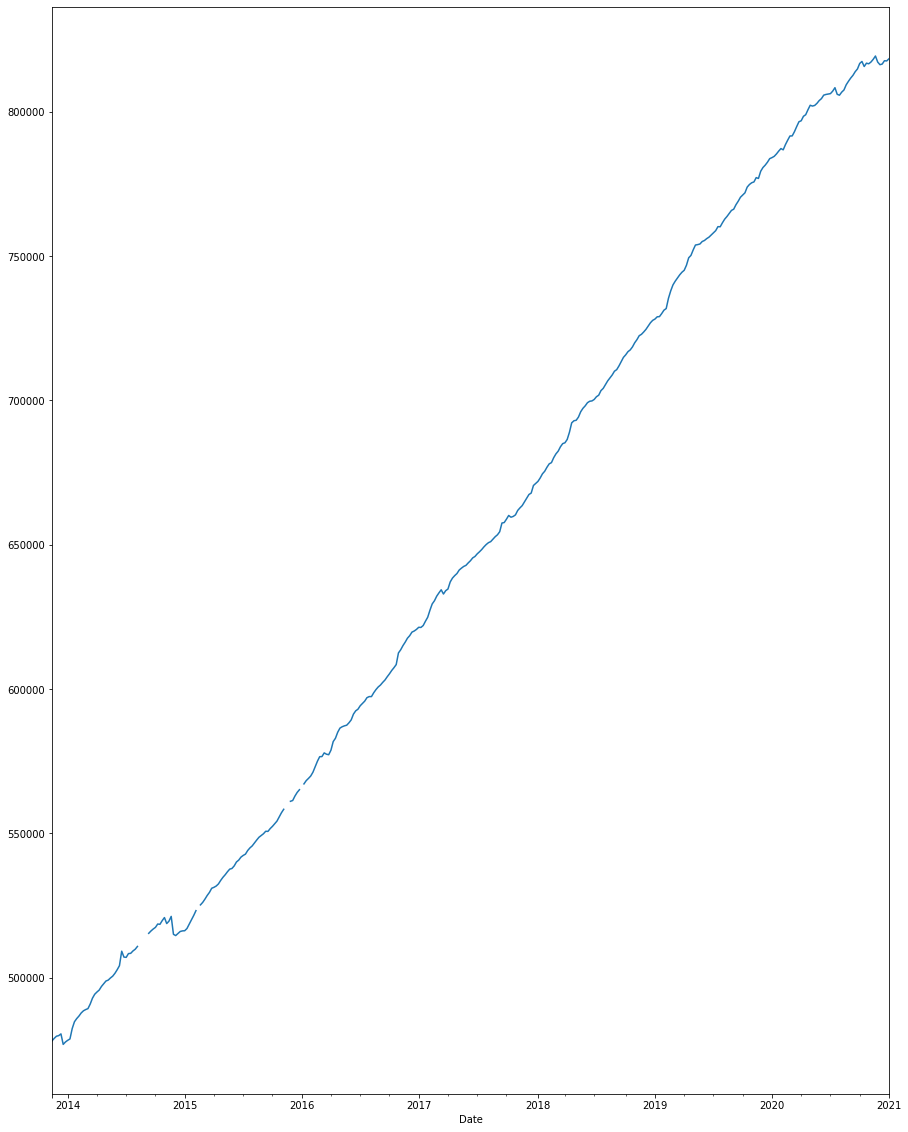

In [2]:
bme['Total_count'].resample('W').mean().plot(figsize=(15,20))

<AxesSubplot:xlabel='Date'>

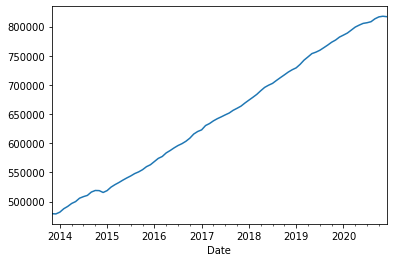

In [6]:
bme['Total_count'].resample('M').mean().plot()

In [2]:
# Create an index list from the set of dates in both data frames
Index = list(set(list(bme.index) + list(vh1.index )+ list(vh2.index) + list(sze.index)))
Index.sort()

df3 = pd.DataFrame({'bme': [bme.loc[Date, 'Total_count'] if Date in bme.index else np.nan for Date in Index],
                    'vh1': [vh1.loc[Date, 'Total_count'] if Date in vh1.index else np.nan for Date in Index],
                    'vh2': [vh2.loc[Date, 'Total_count'] if Date in vh2.index else np.nan for Date in Index],
                    'szeged': [sze.loc[Date, 'Total_count'] if Date in sze.index else np.nan for Date in Index],
                   },index = Index)

# df3[np.abs(df3.vh2-df3.vh2.mean()) <= (3*df3.vh2.std())]
q = df3["bme"].quantile(0.99)
df3[df3["bme"] < q]


,bme,vh1,vh2,szeged
2013-11-13,478068.0,NaN,NaN,NaN
2013-11-20,478982.0,NaN,NaN,NaN
2013-11-21,479190.0,NaN,NaN,NaN
2013-11-22,478766.0,NaN,NaN,NaN
2013-11-23,479081.0,NaN,NaN,NaN
...,...,...,...,...
2020-12-22,817684.0,818583.0,817674.0,817675.0
2020-12-23,817380.0,818276.0,817341.0,817370.0
2020-12-24,817584.0,818507.0,817563.0,817281.0
2020-12-26,817547.0,818460.0,817552.0,817576.0


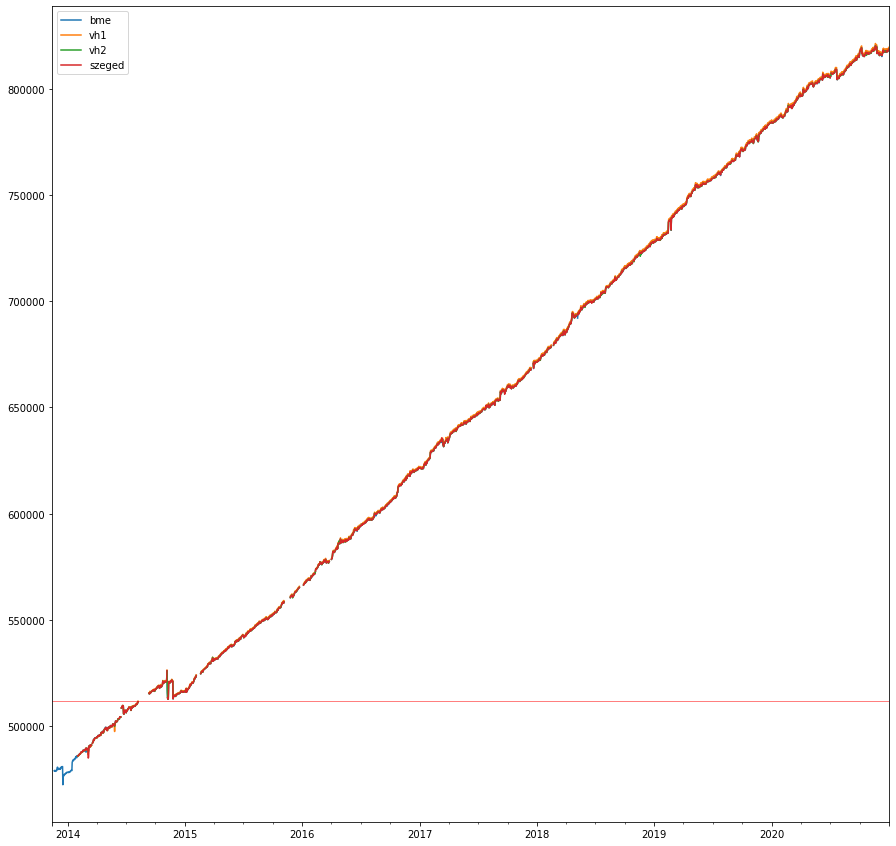

In [3]:
df3.resample('D').mean().plot(figsize=(15,15)).axhline(y=512000, linewidth=0.5, color='r', linestyle='-')


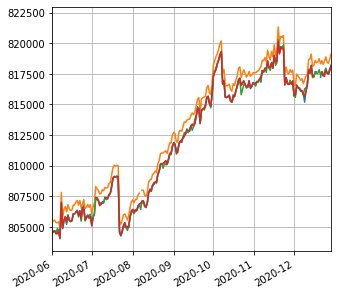

In [11]:
plot = df3.plot(figsize=(5,5)).grid()
axes = plt.gca()
axes.set_xlim(['2020-06-01','2020-12-29'])
axes.set_ylim([803000,823000])
axes.get_legend().remove()


In [14]:
start="\'Pref_"
p="\' , \'Pref_"
print(p)
for i in range(8,32):
    start+=str(i)+p
start+="32\'"
print(start)
bme.resample('M').mean()plot(y=['Pref_8' , 'Pref_9' , 'Pref_10' , 'Pref_11' , 'Pref_12' , 'Pref_13' , 'Pref_14' , 'Pref_15' , 'Pref_16' , 'Pref_17' , 'Pref_18' , 'Pref_19' , 'Pref_20' , 'Pref_21' , 'Pref_22' , 'Pref_23' , 'Pref_24' , 'Pref_25' , 'Pref_26' , 'Pref_27' , 'Pref_28' , 'Pref_29' , 'Pref_30' , 'Pref_31' , 'Pref_32'])
# df.plot(x="X", y=["A", "B", "C"], kind="bar")

SyntaxError: invalid syntax (<ipython-input-14-8bf67b8fa81c>, line 8)

In [15]:
bme.T.resample('M').mean().plot(x=['Pref_8' , 'Pref_9' , 'Pref_10' , 'Pref_11' , 'Pref_12' , 'Pref_13' , 'Pref_14' , 'Pref_15' , 'Pref_16' , 'Pref_17' , 'Pref_18' , 'Pref_19' , 'Pref_20' , 'Pref_21' , 'Pref_22' , 'Pref_23' , 'Pref_24' , 'Pref_25' , 'Pref_26' , 'Pref_27' , 'Pref_28' , 'Pref_29' , 'Pref_30' , 'Pref_31' , 'Pref_32'],y="Date",figsize=(40,20),kind="bar")
bmet=bme.T

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

c:\users\baki\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


MemoryError: In RendererAgg: Out of memory

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1DA00030> (for post_execute):


MemoryError: In RendererAgg: Out of memory

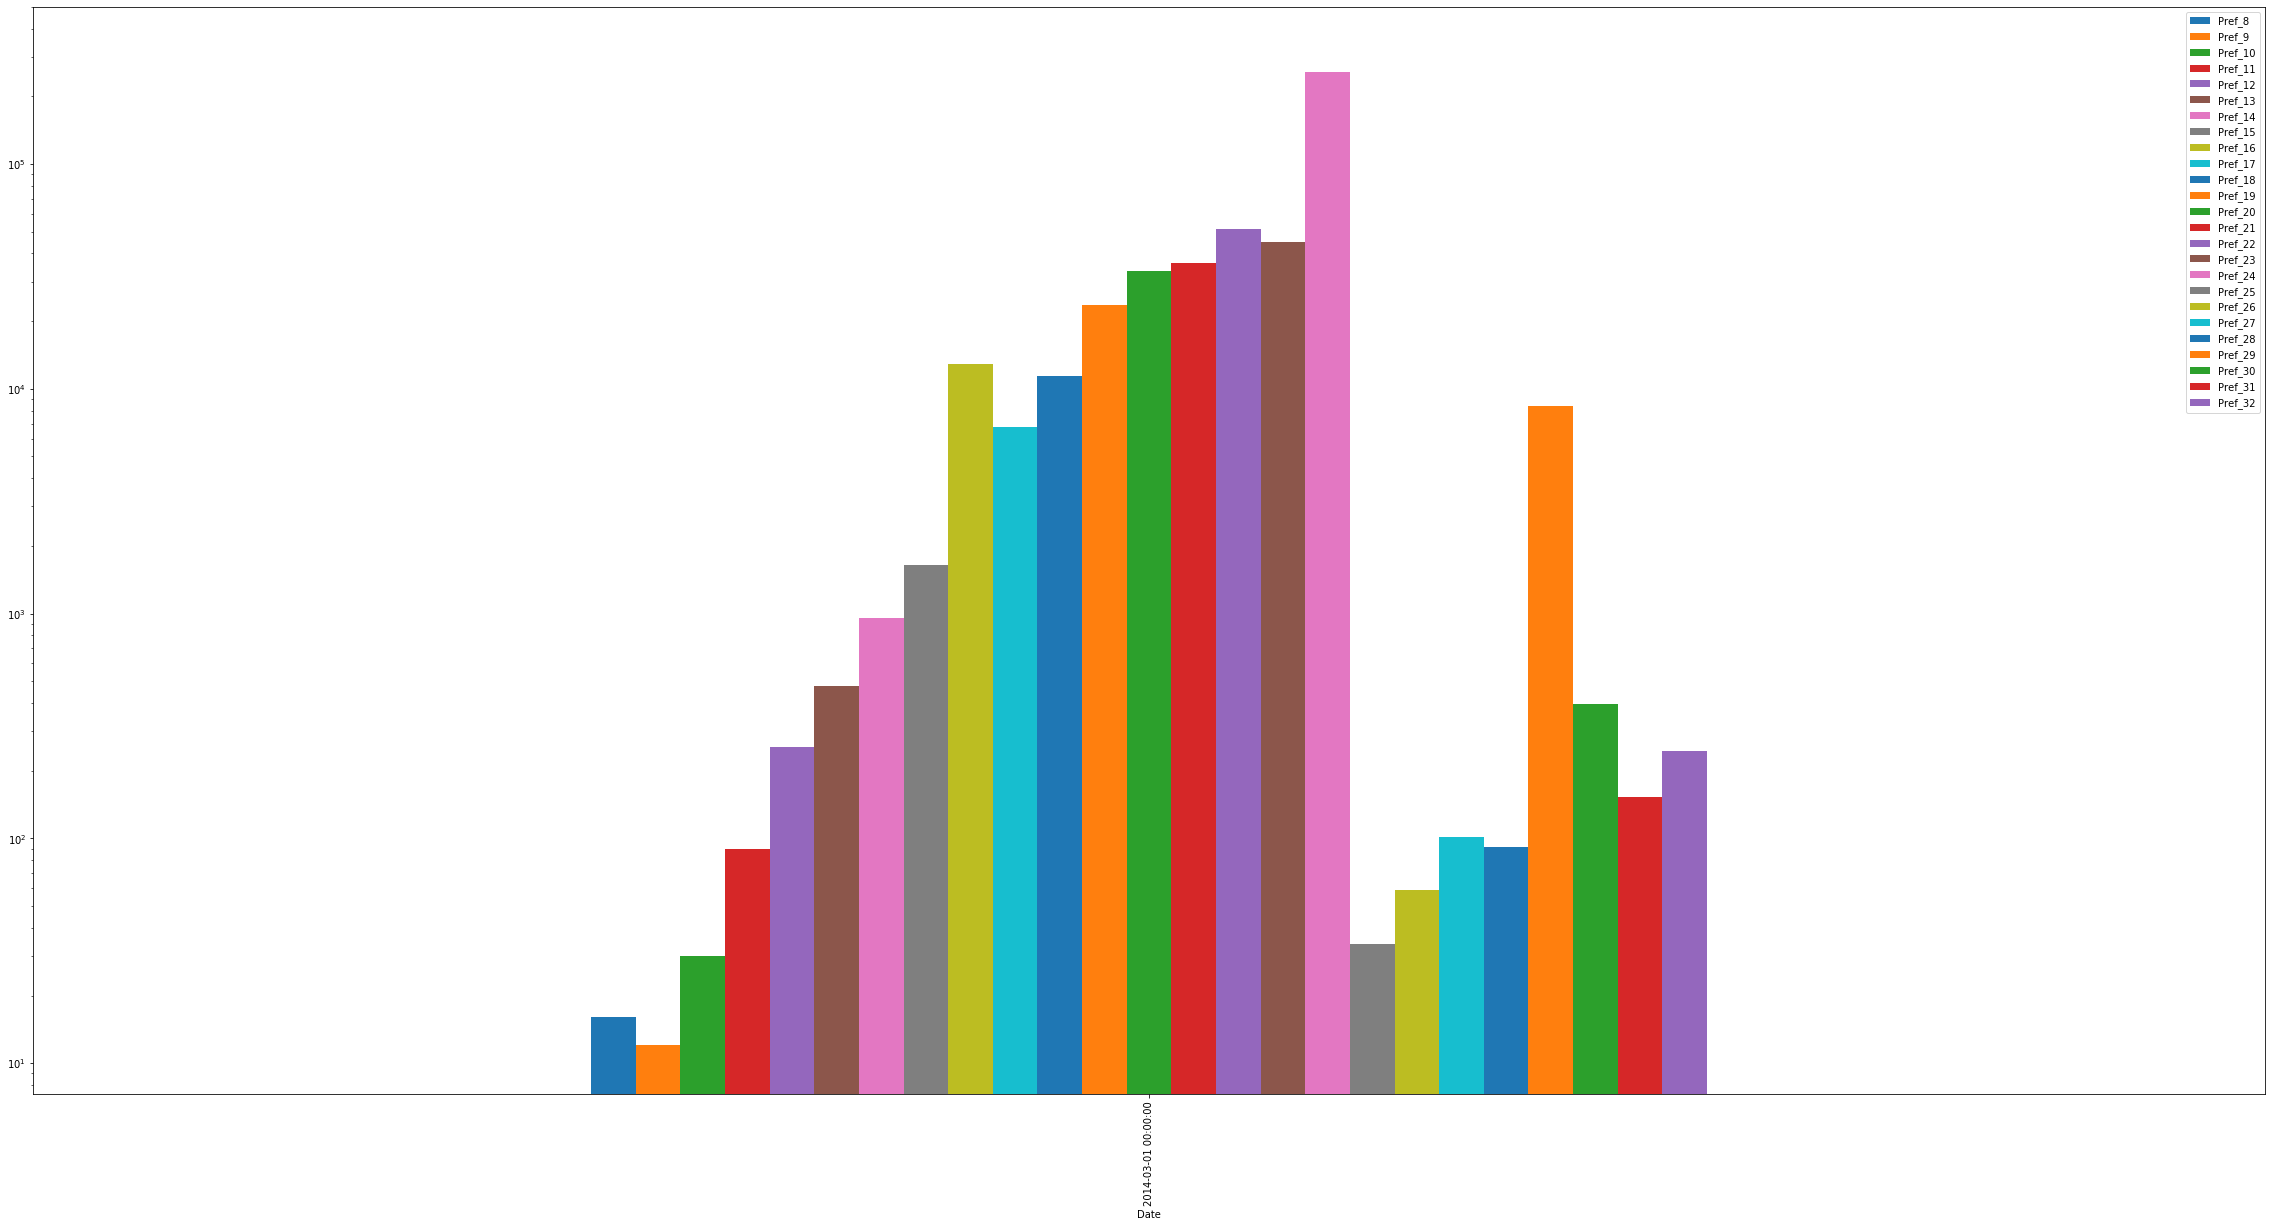

MemoryError: In RendererAgg: Out of memory

<Figure size 2880x1440 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 2880x1440 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 2880x1440 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 2880x1440 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 2880x1440 with 1 Axes>

In [79]:
for i in range(1,19):
    
    plot = bme.iloc[i*100:i*100+1].plot(y=['Pref_8' , 'Pref_9' , 'Pref_10' , 'Pref_11' , 'Pref_12' , 'Pref_13' , 'Pref_14' , 'Pref_15' , 'Pref_16' , 'Pref_17' , 'Pref_18' , 'Pref_19' , 'Pref_20' , 'Pref_21' , 'Pref_22' , 'Pref_23' , 'Pref_24' , 'Pref_25' , 'Pref_26' , 'Pref_27' , 'Pref_28' , 'Pref_29' , 'Pref_30' , 'Pref_31' , 'Pref_32'],figsize=(40,20),kind="bar")
    plot.set_yscale('log')
    plot.set_ylim([0,500000])
    fig = plot.get_figure()
    fig.savefig(str(i*100)+".png")

In [3]:
# Create an index list from the set of dates in both data frames
Index = list(set(list(bme.index)))
Index.sort()

df4 = pd.DataFrame({'bme': [bme.loc[Date, 'Total_count'] if Date in bme.index else np.nan for Date in Index],
                    'vh1': [vh1.loc[Date, 'Total_count'] if Date in vh1.index else np.nan for Date in Index],
                    'vh2': [vh2.loc[Date, 'Total_count'] if Date in vh2.index else np.nan for Date in Index],
                    'szeged': [sze.loc[Date, 'Total_count'] if Date in sze.index else np.nan for Date in Index],
                   },index = Index)





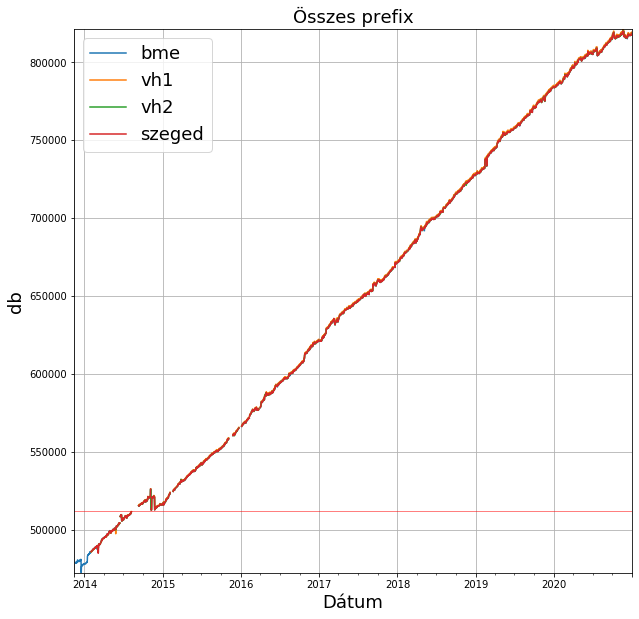

In [6]:
df4.resample('D').mean().plot(figsize=(10,10)).grid(9)
plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=18)
plt.autoscale(enable=True, axis='both', tight=None)
plt.xlabel('Dátum', fontsize=18)
plt.ylabel('db', fontsize=18)
plt.title('Összes prefix', fontsize=18)
plt.axhline(y=512000, linewidth=0.5, color='r', linestyle='-')
plt.margins(0) 



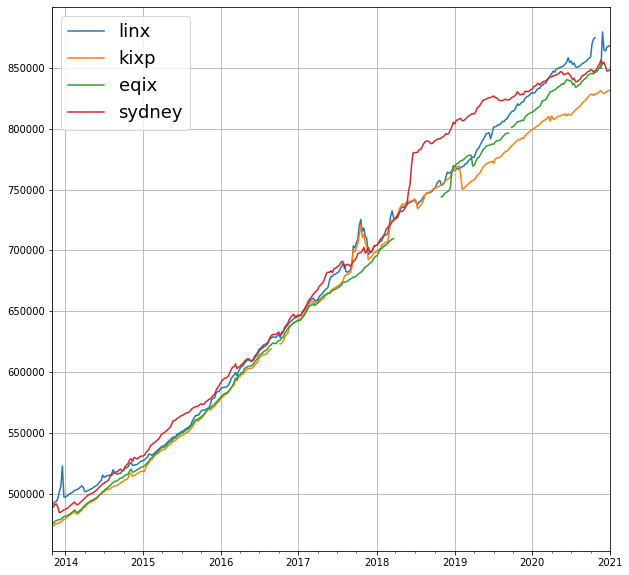

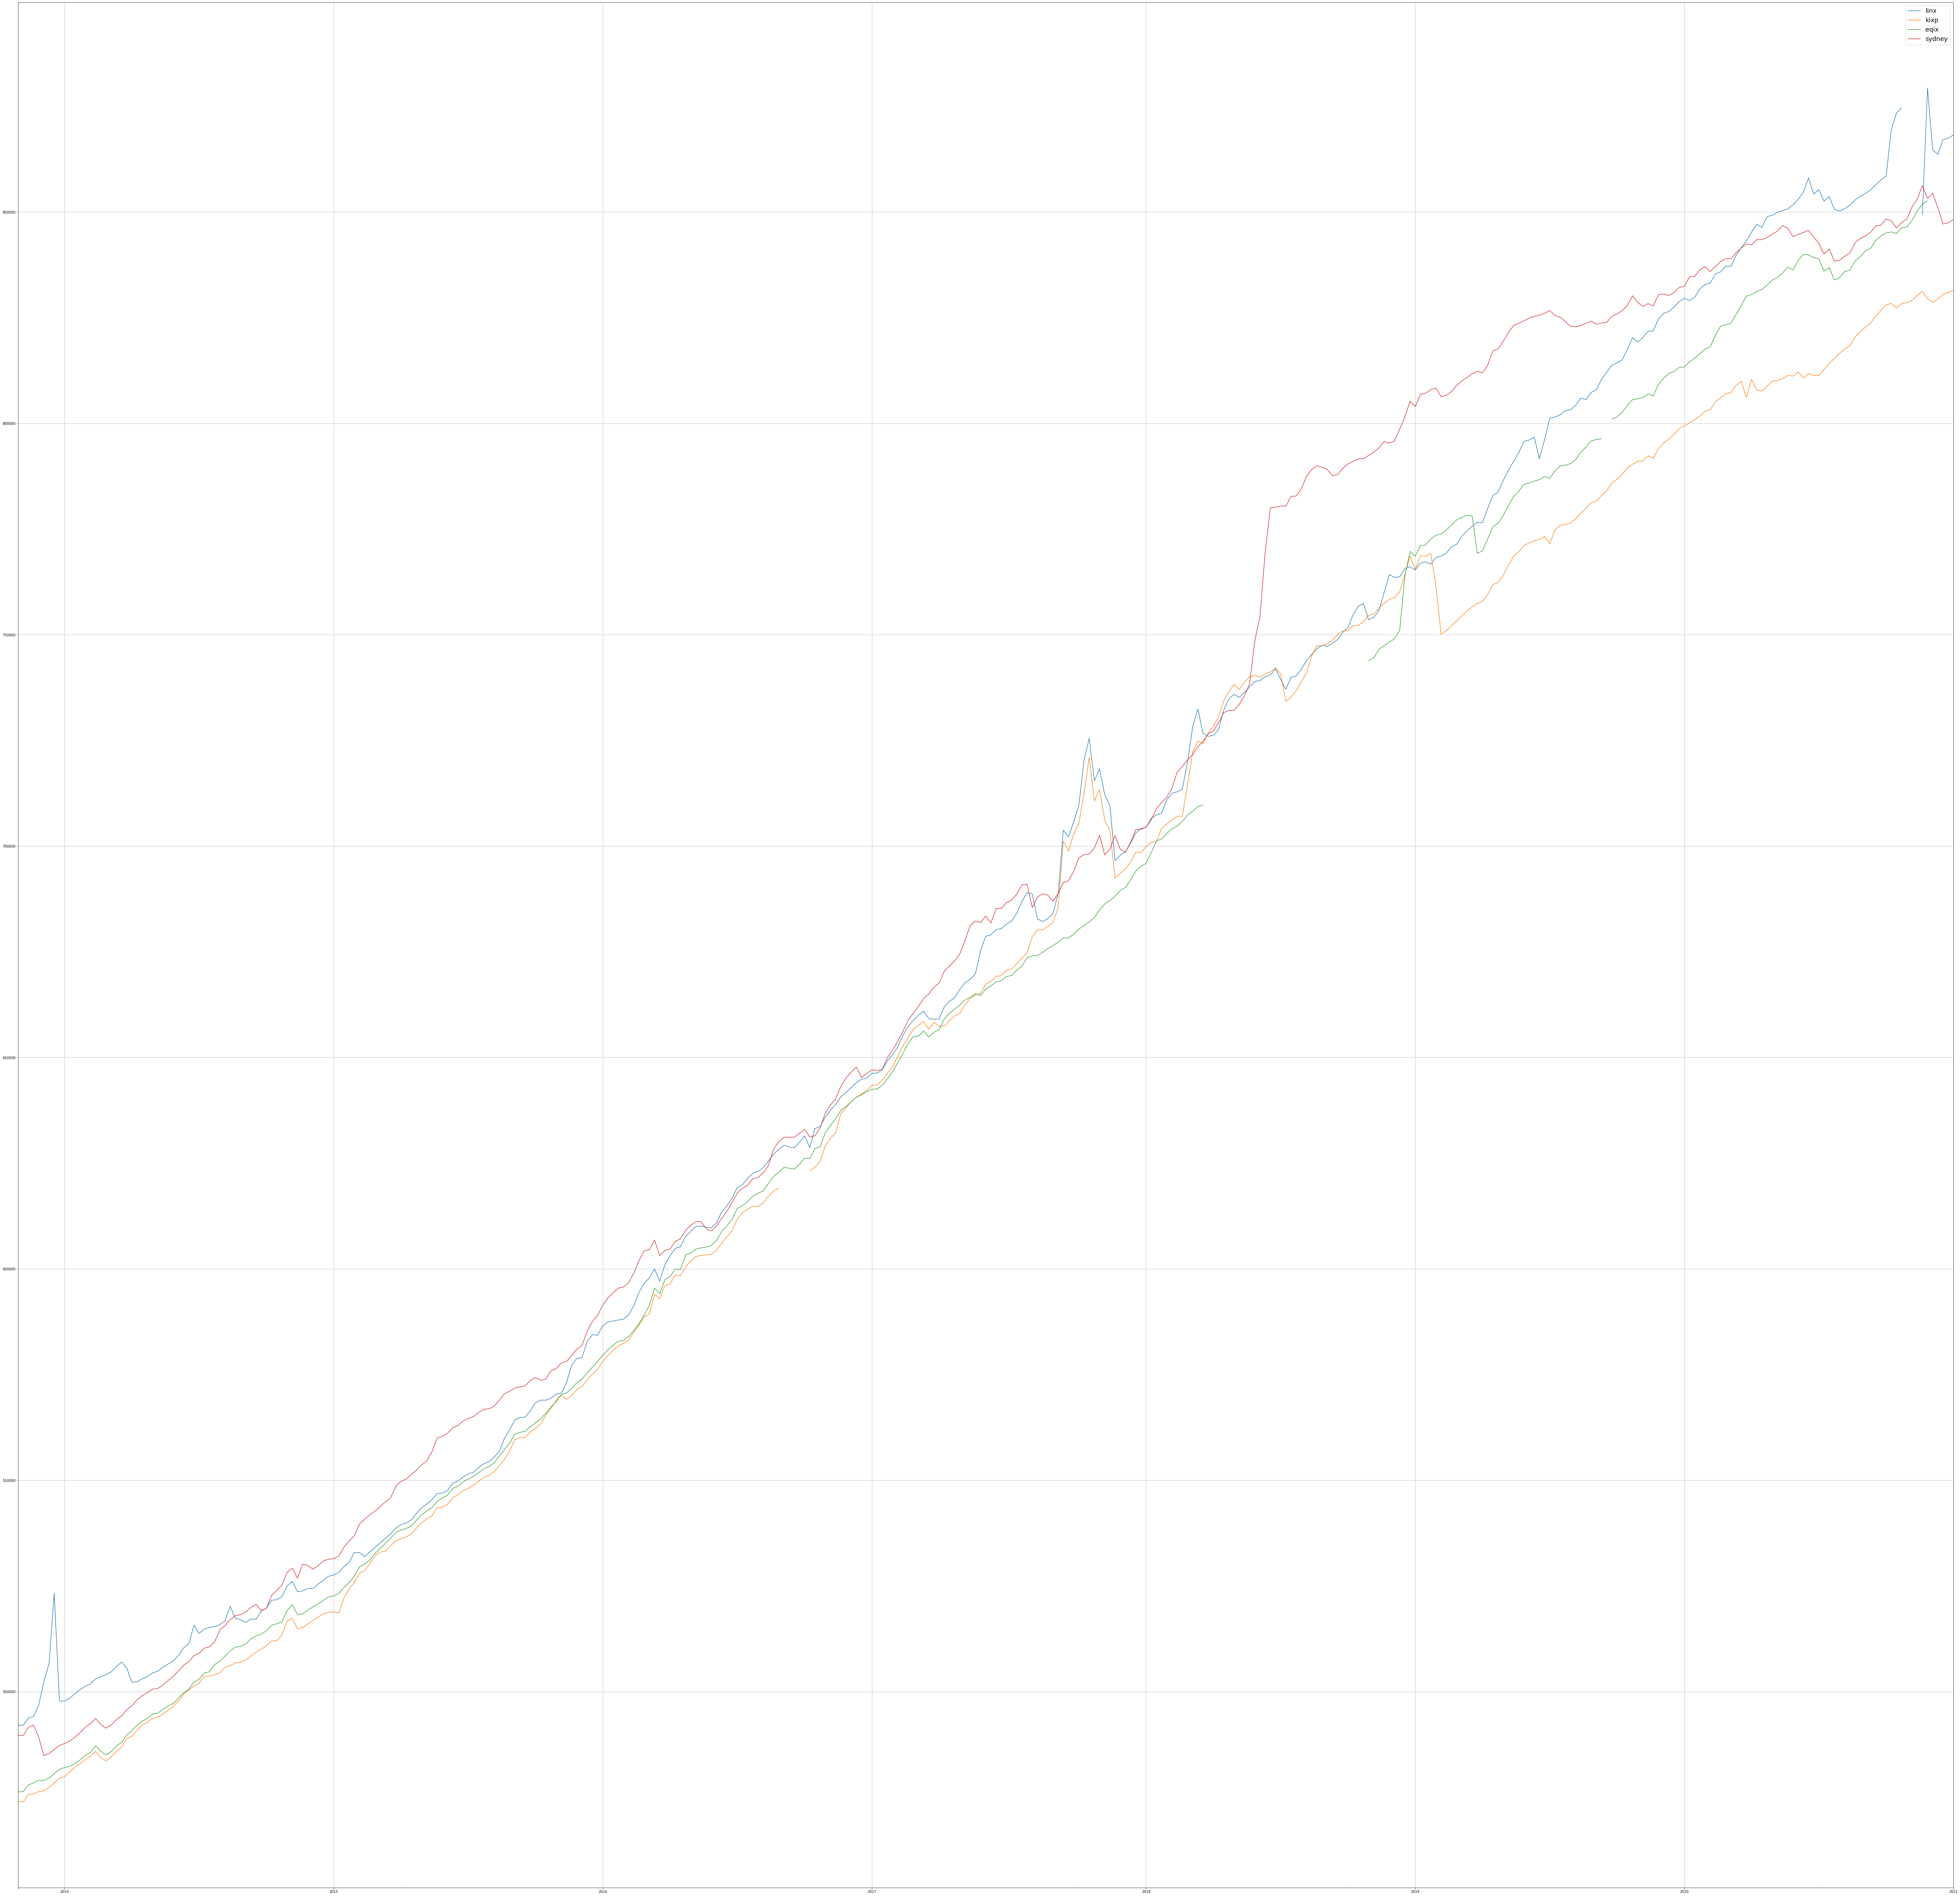

In [25]:
Index = list(set(list(lin.index) + list(kix.index )+ list(eqi.index) + list(syd.index)))
Index.sort()

df5 = pd.DataFrame({'linx': [lin.loc[Date, 'Total_count'] if Date in lin.index else np.nan for Date in Index],
                    'kixp': [kix.loc[Date, 'Total_count'] if Date in kix.index else np.nan for Date in Index],
                    'eqix': [eqi.loc[Date, 'Total_count'] if Date in eqi.index else np.nan for Date in Index],
                    'sydney': [syd.loc[Date, 'Total_count'] if Date in syd.index else np.nan for Date in Index],
                   },index = Index)
plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=18)
df5.resample('W').mean().plot(figsize=(10,10)).grid(9)
df5.resample('W').mean().plot(figsize=(100,100)).grid(9)

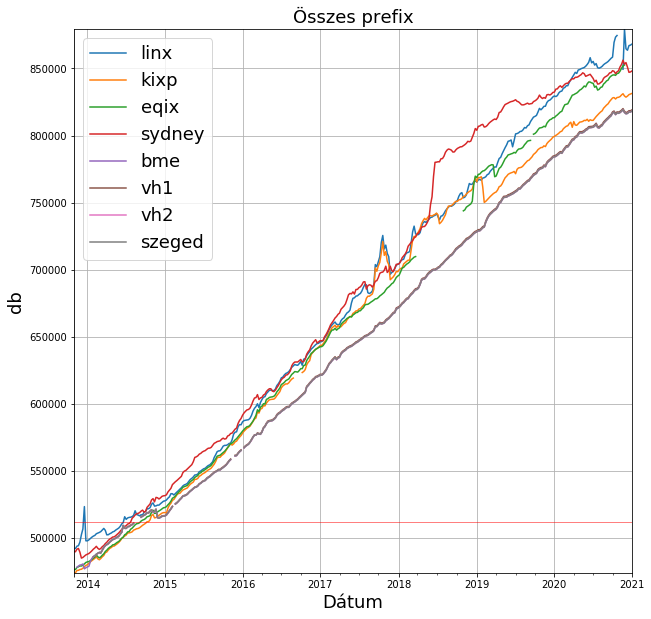

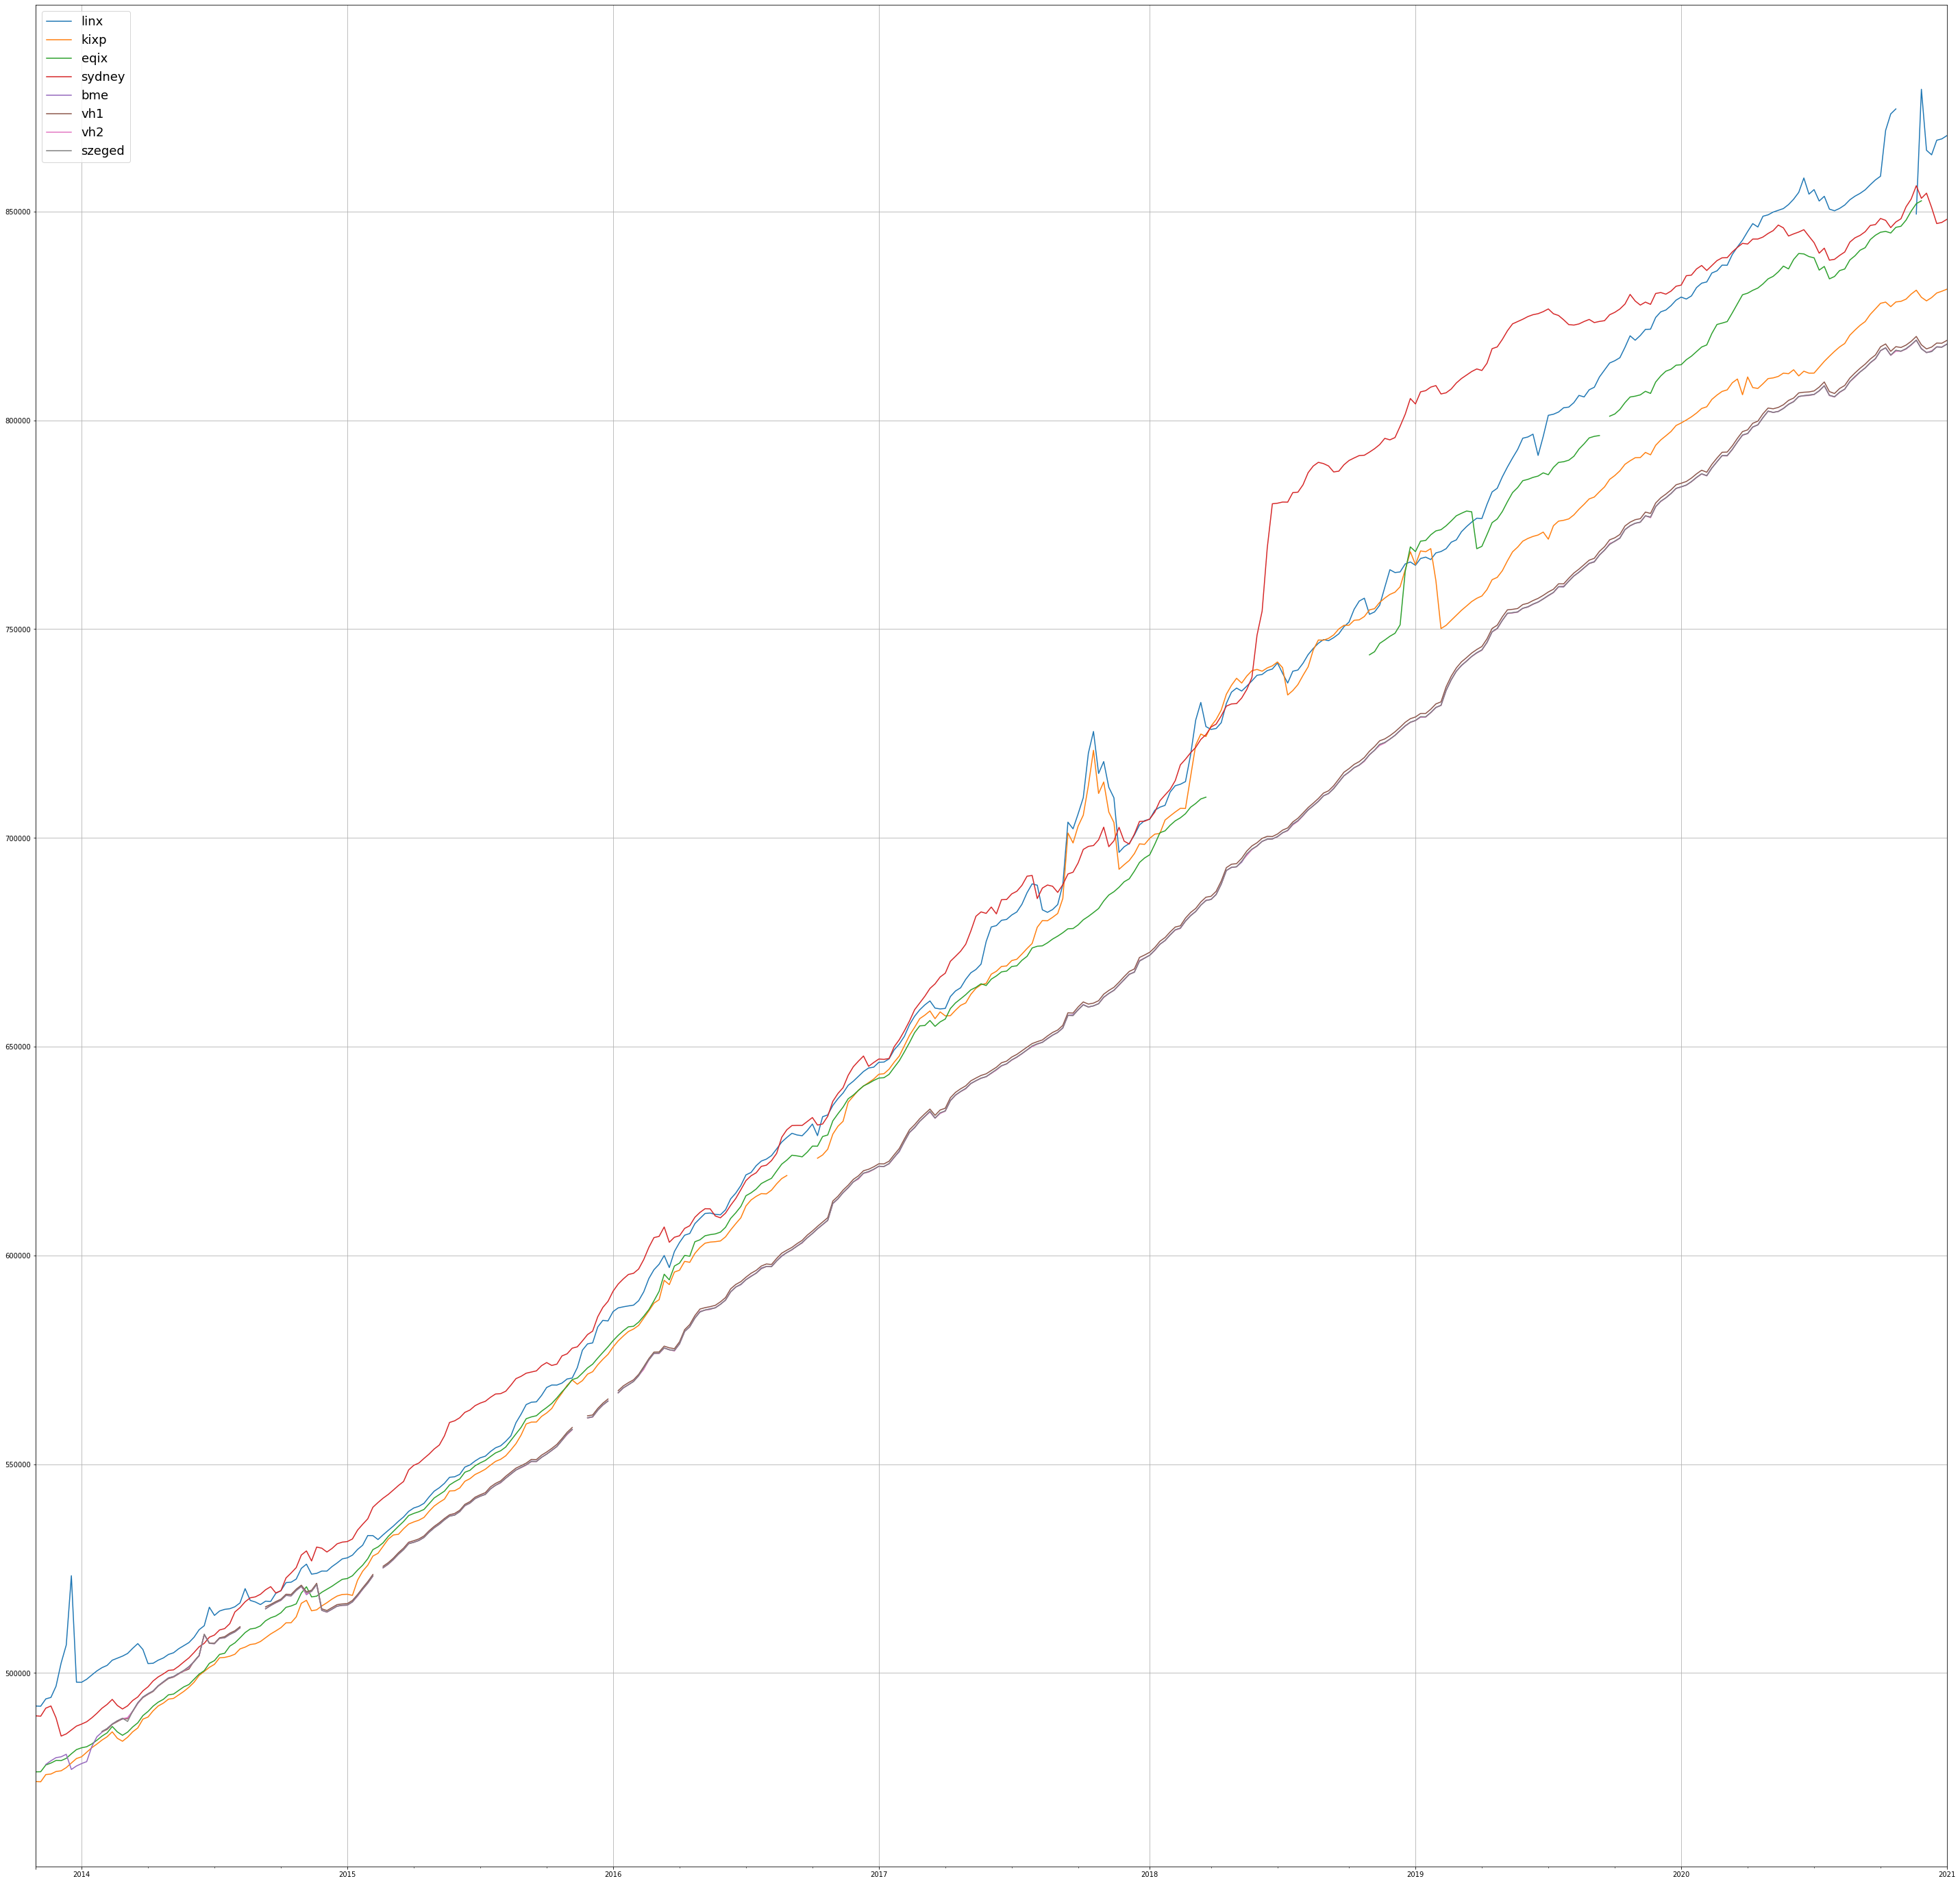

In [5]:
Index = list(set(list(bme.index)  +list(lin.index) + list(kix.index )+ list(eqi.index) + list(syd.index)))
Index.sort()

df5 = pd.DataFrame({'linx': [lin.loc[Date, 'Total_count'] if Date in lin.index else np.nan for Date in Index],
                    'kixp': [kix.loc[Date, 'Total_count'] if Date in kix.index else np.nan for Date in Index],
                    'eqix': [eqi.loc[Date, 'Total_count'] if Date in eqi.index else np.nan for Date in Index],
                    'sydney': [syd.loc[Date, 'Total_count'] if Date in syd.index else np.nan for Date in Index],
                    'bme': [bme.loc[Date, 'Total_count'] if Date in bme.index else np.nan for Date in Index],
                    'vh1': [vh1.loc[Date, 'Total_count'] if Date in vh1.index else np.nan for Date in Index],
                    'vh2': [vh2.loc[Date, 'Total_count'] if Date in vh2.index else np.nan for Date in Index],
                    'szeged': [sze.loc[Date, 'Total_count'] if Date in sze.index else np.nan for Date in Index],
                    
                   },index = Index)

df5.resample('W').mean().plot(figsize=(10,10)).grid(9)
plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=18)
plt.autoscale(enable=True, axis='both', tight=None)
plt.xlabel('Dátum')
plt.ylabel('db')
plt.title('Összes prefix', fontsize=18)
plt.axhline(y=512000, linewidth=0.5, color='r', linestyle='-')
plt.margins(0) 
df5.resample('W').mean().plot(figsize=(50,50)).grid(9)

In [30]:
bme['diff'] = vh1['Total_count'] - bme['Total_count']
bme['pref_msp_nor'] = bme['Msp_sum'] / bme['Total_count']
vh1['pref_msp_nor'] = vh1['Msp_sum'] / vh1['Total_count']
vh2['pref_msp_nor'] = vh2['Msp_sum'] / vh2['Total_count']
sze['pref_msp_nor'] = sze['Msp_sum'] / sze['Total_count']
lin['pref_msp_nor'] = lin['Msp_sum'] / lin['Total_count']
kix['pref_msp_nor'] = kix['Msp_sum'] / kix['Total_count']
eqi['pref_msp_nor'] = eqi['Msp_sum'] / eqi['Total_count']
syd['pref_msp_nor'] = syd['Msp_sum'] / syd['Total_count']

Index = list(set(list(bme.index) + list(vh1.index )+ list(vh2.index) + list(sze.index) +list(lin.index) + list(kix.index )+ list(eqi.index) + list(syd.index)))
Index.sort()

df6 = pd.DataFrame({'linx': [lin.loc[Date, 'pref_msp_nor'] if Date in lin.index else np.nan for Date in Index],
                    'kixp': [kix.loc[Date, 'pref_msp_nor'] if Date in kix.index else np.nan for Date in Index],
                    'eqix': [eqi.loc[Date, 'pref_msp_nor'] if Date in eqi.index else np.nan for Date in Index],
                    'sydney': [syd.loc[Date, 'pref_msp_nor'] if Date in syd.index else np.nan for Date in Index],
                    'bme': [bme.loc[Date, 'pref_msp_nor'] if Date in bme.index else np.nan for Date in Index],
                    'vh1': [vh1.loc[Date, 'pref_msp_nor'] if Date in vh1.index else np.nan for Date in Index],
                    'vh2': [vh2.loc[Date, 'pref_msp_nor'] if Date in vh2.index else np.nan for Date in Index],
                    'szeged': [sze.loc[Date, 'pref_msp_nor'] if Date in sze.index else np.nan for Date in Index],
                   },index = Index)
#ax = df6.resample('W').mean().plot(figsize=(10,10))

bme['diff'].mean()
#bme['diff'].resample('W').mean().plot(figsize=(20,10)).grid()


                                   

610.0183134582624

In [35]:
bme['diff2'] = (lin['Total_count'] + kix['Total_count'] + syd['Total_count'])/3 - bme['Total_count']
syd['diff3'] = syd['Per_8'] - bme['Per_8']
kix['diff3'] = syd['Per_8'] - bme['Per_8']

kix['diff3'].mean()


27529.996269922

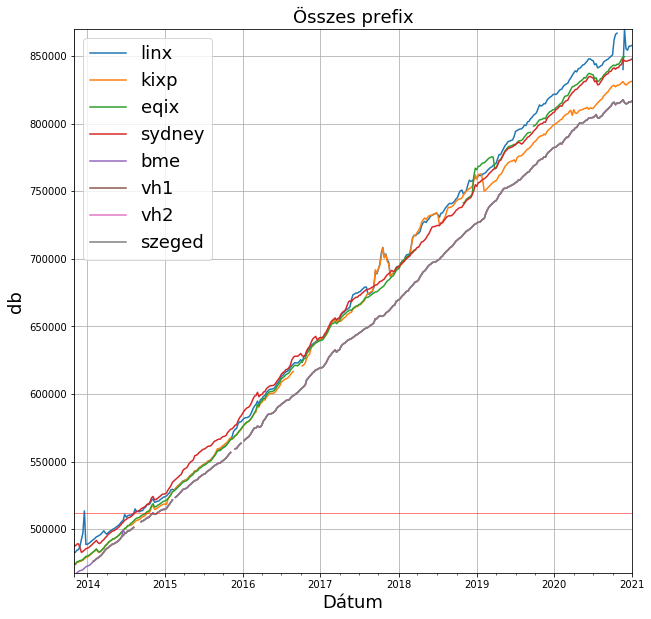

In [16]:
Index = list(set(list(bme.index)  +list(lin.index) + list(kix.index )+ list(eqi.index) + list(syd.index)))
Index.sort()

df5 = pd.DataFrame({'linx': [lin.loc[Date, 'Total_count'] if Date in lin.index else np.nan for Date in Index],
                    'kixp': [kix.loc[Date, 'Total_count'] if Date in kix.index else np.nan for Date in Index],
                    'eqix': [eqi.loc[Date, 'Total_count'] if Date in eqi.index else np.nan for Date in Index],
                    'sydney': [syd.loc[Date, 'Total_count'] if Date in syd.index else np.nan for Date in Index],
                    'bme': [bme.loc[Date, 'Total_count'] if Date in bme.index else np.nan for Date in Index],
                    'vh1': [vh1.loc[Date, 'Total_count'] if Date in vh1.index else np.nan for Date in Index],
                    'vh2': [vh2.loc[Date, 'Total_count'] if Date in vh2.index else np.nan for Date in Index],
                    'szeged': [sze.loc[Date, 'Total_count'] if Date in sze.index else np.nan for Date in Index],
                    
                   },index = Index)



c=25
for i in range(8):
    
    col='Pref_'+str(c)
        
    df5['linx'] = df5['linx'] - lin[col]
    df5['kixp'] = df5['kixp'] - kix[col]
    df5['eqix'] = df5['eqix'] - eqi[col]
    df5['sydney'] = df5['sydney'] - syd[col]
    df5['bme'] = df5['bme'] - bme[col]
    df5['vh1'] = df5['vh1'] - vh1[col]
    df5['vh2'] = df5['vh2'] - vh2[col]
    df5['szeged'] = df5['szeged'] - sze[col]
    c+=1

df5
df5.resample('W').mean().plot(figsize=(10,10)).grid(9)
plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=18)
plt.autoscale(enable=True, axis='both', tight=None)
plt.xlabel('Dátum')
plt.ylabel('db')
plt.title('Összes prefix', fontsize=18)
plt.axhline(y=512000, linewidth=0.5, color='r', linestyle='-')
plt.margins(0) 